---

# NASDAQ 100 Stocks Movement Predictor - Modelling

**Author:** Renish Kanjiyani <br>
**Notebook:** Modelling <br>
**Date:** 05/11/2023 <br>

---

# Table of Contents:

## 1. [Introduction](#1)

## [2. Modelling](#2)

### [2.1 Importing Packages & Dataset](#2.1)

### [](#2.2)

### [](#2.3)

### [](#2.4)

### []()

### []()

## [3. Conclusion](#3)


---

<a id=1></a>
## Introduction:

---

<a id=1></a>
## Modelling:

### Logistic Regression - Apple Stocks

In [2]:
# Importing the necessary packages 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#Train/Test split 
from sklearn.model_selection import train_test_split

#Scaling our data 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#for our models 
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# To save our models 
import joblib

# Avoid seeing any warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset 

apple_df = pd.read_csv('../clean_apple_stocks.csv')

In [4]:
# Viewing the first rows of the dataframe
apple_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
0,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591,1
1,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935,0
2,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369,0
3,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407,1
4,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339,0


In [5]:
# Checking the shape
apple_df.shape

(2942, 9)

In [6]:
# Applying Logistic Regression 

# Assigning Variables 

X = apple_df.drop(['Adj Closing Price Change', 'Date'], axis= 1)
y = apple_df['Adj Closing Price Change']

In [7]:
# Split into train/test 

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [8]:
# Let's view the shape our splits 

print(f"After the split our Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")

print(f"After the split our Test set has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

print(f"After the split our Validation set has {X_val.shape[0]} rows and {X_val.shape[1]} columns.")

print(f"After the split our Remainder set has {X_rem.shape[0]} rows and {X_rem.shape[1]} columns.")

After the split our Training set has 1647 rows and 7 columns.
After the split our Test set has 883 rows and 7 columns.
After the split our Validation set has 412 rows and 7 columns.
After the split our Remainder set has 2059 rows and 7 columns.


In [9]:
# Scaling the data 

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Logistic Regression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.6642380085003036
Validation score 0.6359223300970874
Test score 0.6636466591166478


Now that we have our scores on the base model, let's go ahead and look at the confusion matrix and the classification report. 

In [16]:
# Predicting on unseen data 

y_pred_apple = logreg.predict(X_test_scaled)

In [17]:
# Confusion Matrix 

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_apple)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,165,250
True Positive,47,421


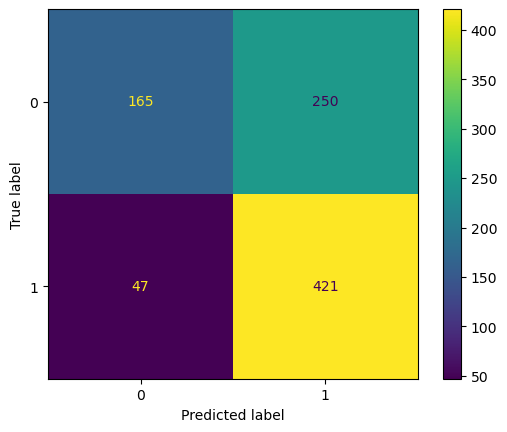

In [18]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

**Observations:** 

- The first thing we note about the following is that the the data we have is too small and therefore we are not getting accurate predictions. 

- From the confusion matrix we can see that the model was able to accurately predict `165` out of `415` as class 0 and for class 1 it accurately predicted `421` out of `468`.

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 421    | 165    | 47     | 250    |

- We can see that it was able to predict most values for class 1 as `1` compared to class 0. This could be because size of class 1 might be greater than class 0. 

Let's go ahead and see our classification report for the above.

In [14]:
# Classification Report 

apple_report = classification_report(y_test, y_pred_apple)
print(apple_report)

              precision    recall  f1-score   support

           0       0.78      0.40      0.53       415
           1       0.63      0.90      0.74       468

    accuracy                           0.66       883
   macro avg       0.70      0.65      0.63       883
weighted avg       0.70      0.66      0.64       883



**Observations:** 

- As observed earlier, the total samples for class 0 is `415` and for class 1 is `468` this tells us that the amount of data we have is very small and therefore could cause an issue moving forward when applying more complex models. 

- Our classification report also shows how it predicted `78%` of the samples as class 0 and `63%` of the samples as class 1. The recall for class 0 is at `40%` which tells us that only 40% of the actual class 0 samples were correctly identified. While, the recall for class 1 is at `90%` meaning it that 90% of the actual class 1 samples were correctly identified. 

- We can also evaluate our model accuracy using the f1-score accuracy. In our case this accuracy is at `66%` meaning only 66% of the predictions across all classes are correct. 

Our next step would be to go back to our EDA notebook and prepare a dataset with more values. 

---

### Logistic Regression - Original Dataframe

The following models are implemented after performing further EDA from EDA-2 notebook.

In [19]:
# Loading our clean dataset from the EDA - 2 Notebook 

stocks_df = pd.read_csv('../clean_data.csv')

In [20]:
# Viewing our dataframe 

stocks_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
0,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591,1
1,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935,0
2,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369,0
3,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407,1
4,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339,0
5,7.471071,7.491786,7.372143,7.418571,6.369709,594459600,6.442997,0
6,7.423929,7.533214,7.289286,7.523214,6.459555,605892000,6.369709,1
7,7.503929,7.516429,7.465000,7.479643,6.422143,432894000,6.459555,0
8,7.533214,7.557143,7.352500,7.354643,6.314816,594067600,6.422143,0
9,7.440357,7.685357,7.401429,7.680000,6.594175,730007600,6.314816,1


In [21]:
# Shape of our dataframe 

stocks_df.shape

(271679, 8)

In [22]:
print(f"We are back to our original dataframe that now has {stocks_df.shape[0]} rows and {stocks_df.shape[1]} columns.")

We are back to our original dataframe that now has 271679 rows and 8 columns.


In [23]:
# Applying Logistic Regression 

# Assigning Variables 

X = stocks_df.drop(['Open', 'Adj Closing Price Change', 'High', 'Low', 'Close'], axis= 1)
y = stocks_df['Adj Closing Price Change']

In [24]:
# Split into train/test 

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [25]:
# Let's view the shape our splits 

print(f"After the split our Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")

print(f"After the split our Test set has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

print(f"After the split our Validation set has {X_val.shape[0]} rows and {X_val.shape[1]} columns.")

print(f"After the split our Remainder set has {X_rem.shape[0]} rows and {X_rem.shape[1]} columns.")

After the split our Training set has 152140 rows and 3 columns.
After the split our Test set has 81504 rows and 3 columns.
After the split our Validation set has 38035 rows and 3 columns.
After the split our Remainder set has 190175 rows and 3 columns.


In [26]:
# Scaling the data 

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Logistic Regression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.8395293808334429
Validation score 0.8384382805310898
Test score 0.8345848056537103


The scores on the following base logistic model are higher than what we had from the first model we ran above. Let's take a further look at the performance of this model. 

In [29]:
# Predicting on unseen data
y_pred_original = logreg.predict(X_test_scaled)

Let's go ahead and print our confusion matrix and the classification report. 

In [30]:
# Confusion Matrix 

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_original)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,25368,13402
True Positive,80,42654


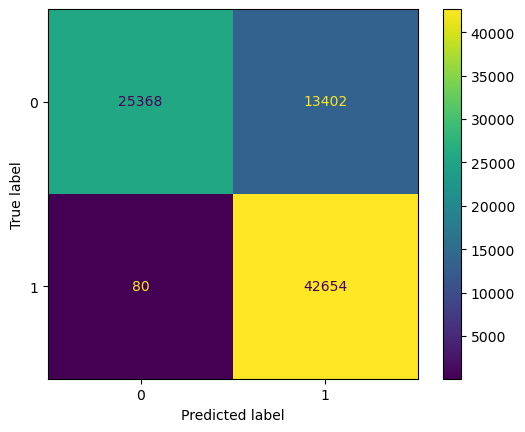

In [31]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

**Observations:** 

- 

In [32]:
report = classification_report(y_test, y_pred_original)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     38770
           1       0.76      1.00      0.86     42734

    accuracy                           0.83     81504
   macro avg       0.88      0.83      0.83     81504
weighted avg       0.87      0.83      0.83     81504



**Observations:** 

- 

---

### Logistic Regression - Sample Data

### After sampling:

In [ ]:
# Loading our balanced dataset from the EDA - 2 Notebook 

balanced_df = pd.read_csv('../sample_balanced_data.csv')

In [ ]:
balanced_df.head(5)

In [ ]:
balanced_df['Adj Closing Price Change'].value_counts()

In [ ]:
# Assigning Variables 

X_balanced = balanced_df.drop(['Adj Closing Price Change'], axis= 1)
y_balanced = balanced_df['Adj Closing Price Change']

In [ ]:
# Split into train/test 

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [ ]:
# Let's view the shape our splits 

print(f"After the split our Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")

print(f"After the split our Test set has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

print(f"After the split our Validation set has {X_val.shape[0]} rows and {X_val.shape[1]} columns.")

print(f"After the split our Remainder set has {X_rem.shape[0]} rows and {X_rem.shape[1]} columns.")

In [ ]:
# Scaling the data 

# Scaling 

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- Why use a min max scaler?

In [ ]:
# Logistic Regression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

In [ ]:
y_pred = logreg.predict(X_test_scaled)


In [ ]:
# Confusion Matrix 

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

In [ ]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

In [ ]:
# Classification Report 

report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# Creating a pipeline to optimize logreg

#Importing the packages

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
# Pipeline

estimators = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]

In [ ]:
# 
from tempfile import mkdtemp
cachedir = mkdtemp()

# 
my_pipe = Pipeline(estimators, memory=cachedir)

In [ ]:
# logistic Regression

logreg_params = {
    'scaler': [MinMaxScaler()],
    'model': [LogisticRegression(random_state = 1)],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__penalty': ['l1','l2'],
    'model__max_iter': [50000]
}

In [ ]:
# 

logreg_grid = GridSearchCV(my_pipe, param_grid =logreg_params, cv = 5, verbose = 2)

In [ ]:
X_rem.shape

In [ ]:
X_rem.describe()

In [ ]:
# 

logreg_fit_grid = logreg_grid.fit(X_rem, y_rem.values.ravel())

In [ ]:
# 

print(f"best score: {logreg_fit_grid.best_score_}")
print(f"best parameters: {logreg_fit_grid.best_params_}")

- Re do logistic regression with the best parameters 
- Observations 

In [ ]:
#save best model 

joblib.dump(logreg_fit_grid, 'logreg.pkl')

## SVM - Support Vector Machines

In [ ]:
from sklearn.svm import LinearSVC

SVM_model = LinearSVC(random_state=1)

SVM_model.fit(X_train_scaled, y_train)

print("Train score", SVM_model.score(X_train_scaled, y_train))
print("Validation score", SVM_model.score(X_val_scaled, y_val))
print("Test score", SVM_model.score(X_test_scaled, y_test))

In [ ]:
y_pred_SVM = SVM_model.predict(X_test_scaled)

In [ ]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_SVM)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

In [ ]:

ConfusionMatrixDisplay.from_estimator(SVM_model, X_test_scaled, y_test)

In [ ]:

report_svm = classification_report(y_test, y_pred_SVM)
print(report_svm)

In [ ]:
# SVM Pipeline 

svm_params = {
    'scaler': [MinMaxScaler()],
    'model': [LinearSVC(random_state = 1)],
    'model__C': [0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1','l2'],
    'model__max_iter': [50000]
}

In [ ]:
svm_grid = GridSearchCV(my_pipe, param_grid =svm_params, cv = 5, verbose = 2)

In [ ]:
svm_fit_grid = svm_grid.fit(X_rem, y_rem.values.ravel())

In [ ]:
# 

print(f"best score: {svm_fit_grid.best_score_}")
print(f"best parameters: {svm_fit_grid.best_params_}")

In [ ]:
#save best model 

joblib.dump(svm_fit_grid, 'svm.pkl')

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=1) 

random_forest_model.fit(X_train_scaled, y_train)

print("Train score", random_forest_model.score(X_train_scaled, y_train))
print("Validation score", random_forest_model.score(X_val_scaled, y_val))
print("Test score", random_forest_model.score(X_test_scaled, y_test))

In [ ]:
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [ ]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

In [ ]:

ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test_scaled, y_test)

In [ ]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

In [ ]:
# Random Forest Pipeline 

rf_params = {
    'scaler': [MinMaxScaler()],
    'model': [RandomForestClassifier(random_state = 1)],
    'model__n_estimators': range(50, 201, 50),
    'model__max_depth': range(3, 12, 2)
}

In [ ]:
rf_grid = GridSearchCV(my_pipe, param_grid =rf_params, cv = 5, verbose = 2)

In [ ]:
rf_fit_grid = rf_grid.fit(X_rem, y_rem.values.ravel())

In [ ]:
# 

print(f"best score: {rf_fit_grid.best_score_}")
print(f"best parameters: {rf_fit_grid.best_params_}")

In [ ]:
#save best model 

joblib.dump(rf_fit_grid, 'random_forest.pkl')

## XG Boost 

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(random_state=1)

xgbc.fit(X_train_scaled, y_train)

print("Train score", xgbc.score(X_train_scaled, y_train))
print("Validation score", xgbc.score(X_val_scaled, y_val))
print("Test score", xgbc.score(X_test_scaled, y_test))

In [ ]:
y_pred_xg = xgbc.predict(X_test_scaled)

In [ ]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_xg)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

In [ ]:

ConfusionMatrixDisplay.from_estimator(xgbc, X_test_scaled, y_test)

In [ ]:
report_xg = classification_report(y_test, y_pred_xg)
print(report_xg)

In [ ]:
# XG Boost Pipeline 

xg_params = {
    'scaler': [MinMaxScaler()],
    'model': [XGBClassifier(random_state = 1)],
    'model__n_estimators': range(50, 201, 50),
    'model__max_depth': range(3, 12, 2),
    'model__learning_rate': [0.1, 0.3, 0.5, 0.7]
}

In [ ]:
xg_grid = GridSearchCV(my_pipe, param_grid =xg_params, cv = 5, verbose = 2)

In [ ]:
xg_fit_grid = xg_grid.fit(X_rem, y_rem.values.ravel())

In [ ]:
# 

print(f"best score: {xg_fit_grid.best_score_}")
print(f"best parameters: {xg_fit_grid.best_params_}")

In [ ]:
#save best model 

joblib.dump(xg_fit_grid, 'xgboost.pkl')